<a href="https://colab.research.google.com/github/VISHNUVARDHAN2730/NLP-4080/blob/main/NLP_Lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze Twitter sentiment data by loading the dataset, preprocessing tweets to clean and tokenize text, computing TF-IDF scores, identifying and visualizing the top TF-IDF terms for negative sentiment using a bar chart, generating a word cloud for negative sentiment, and summarizing the insights gained from the analysis. The input data is expected to be in a CSV file, e.g., 'tweets.csv'.

## Load Data

### Subtask:
Load the Twitter sentiment dataset from the provided CSV file (e.g., 'tweets.csv' or the filename from Kaggle) into a pandas DataFrame. Ensure to handle any potential encoding issues.


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('tweets.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 encoding failed, trying 'latin1'...")
    df = pd.read_csv('tweets.csv', encoding='latin1')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
print(df.head())


DataFrame loaded successfully. Displaying the first 5 rows:
   id                                               text sentiment
0   1           I love this new phone, it is super fast!  positive
1   2  This is a terrible service, utterly disappointed.  negative
2   3  The weather today is just okay, neither good n...   neutral
3   4           Feeling fantastic after a long vacation.  positive
4   5              Absolutely disgusted by the behavior.  negative


**Reasoning**:
The previous code failed with a 'FileNotFoundError' because 'tweets.csv' was not found. To address this, a new step is needed to ensure the file exists. This step will check for the file and, if it's not present, create a dummy 'tweets.csv' with basic columns, allowing subsequent code to execute without error. This provides a reproducible environment while allowing the user to replace the dummy file with their actual data.



In [ ]:
import pandas as pd
import os

file_path = 'tweets.csv'

if not os.path.exists(file_path):
    print(f"'{file_path}' not found. Creating a dummy file for demonstration purposes.")
    # Create a dummy DataFrame with common columns for tweet sentiment analysis
    dummy_data = {
        'id': [1, 2, 3, 4, 5],
        'text': [
            'I love this new phone, it is super fast!',
            'This is a terrible service, utterly disappointed.',
            'The weather today is just okay, neither good nor bad.',
            'Feeling fantastic after a long vacation.',
            'Absolutely disgusted by the behavior.'
        ],
        'sentiment': ['positive', 'negative', 'neutral', 'positive', 'negative']
    }
    dummy_df = pd.DataFrame(dummy_data)
    dummy_df.to_csv(file_path, index=False)
    print(f"A dummy '{file_path}' has been created. Please upload your actual 'tweets.csv' file or provide its correct path if you wish to use your own data.")
else:
    print(f"'{file_path}' already exists.")

print("File check/creation complete. Ready to load the dataset.")

'tweets.csv' not found. Creating a dummy file for demonstration purposes.
A dummy 'tweets.csv' has been created. Please upload your actual 'tweets.csv' file or provide its correct path if you wish to use your own data.
File check/creation complete. Ready to load the dataset.


**Reasoning**:
Now that the 'tweets.csv' file has been ensured to exist (either by being present or by being created as a dummy), the next step is to load this CSV file into a pandas DataFrame, handling potential encoding issues as outlined in the subtask.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('tweets.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 encoding failed, trying 'latin1'...")
    df = pd.read_csv('tweets.csv', encoding='latin1')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,id,text,sentiment
0,1,"I love this new phone, it is super fast!",positive
1,2,"This is a terrible service, utterly disappointed.",negative
2,3,"The weather today is just okay, neither good n...",neutral
3,4,Feeling fantastic after a long vacation.,positive
4,5,Absolutely disgusted by the behavior.,negative


## Preprocess Tweets

### Subtask:
Clean the tweet text by removing URLs, mentions (@user), and hashtags (#topic). Then, tokenize the cleaned text and remove common English stopwords. The output should be a 'cleaned tweet corpus'.


**Reasoning**:
I need to import the necessary libraries, define a preprocessing function, apply it to the 'text' column, and then display the results to complete the subtask. First, I'll import libraries and download NLTK data to prepare for text cleaning.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading NLTK punkt tokenizer...")
    nltk.download('punkt')

print("NLTK resources checked/downloaded.")



NLTK resources checked/downloaded.


**Reasoning**:
The previous code failed because `nltk.downloader.DownloadError` does not exist. The correct exception to catch when `nltk.data.find` fails is `LookupError`. I will update the `try-except` blocks to catch `LookupError` to ensure NLTK resources are downloaded correctly.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading NLTK punkt tokenizer...")
    nltk.download('punkt')

print("NLTK resources checked/downloaded.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK resources checked/downloaded.


**Reasoning**:
Now that the NLTK resources are confirmed to be downloaded, I will define the `preprocess_text` function as outlined in the subtask instructions. This function will clean the text by removing URLs, mentions, and hashtags, convert text to lowercase, tokenize it, and remove stopwords. Finally, I will apply this function to the 'text' column of the DataFrame `df` to create a new 'cleaned_text' column and display the results.



In [ ]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    cleaned_tokens = [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the preprocessing function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("Preprocessing complete. Displaying original and cleaned text:")
print(df[['text', 'cleaned_text']].head())


Preprocessing complete. Displaying original and cleaned text:
                                                text  \
0           I love this new phone, it is super fast!   
1  This is a terrible service, utterly disappointed.   
2  The weather today is just okay, neither good n...   
3           Feeling fantastic after a long vacation.   
4              Absolutely disgusted by the behavior.   

                            cleaned_text  
0              love new phone super fast  
1  terrible service utterly disappointed  
2    weather today okay neither good bad  
3        feeling fantastic long vacation  
4          absolutely disgusted behavior  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reasoning**:
The previous code failed because `nltk.tokenize.word_tokenize` implicitly requires the `punkt_tab` resource, which was not explicitly downloaded. The traceback clearly indicates that `punkt_tab` is missing. I will update the NLTK download block to ensure `punkt_tab` is also downloaded if not found, similar to how 'stopwords' and 'punkt' are handled.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading NLTK punkt tokenizer...")
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading NLTK punkt_tab tokenizer...")
    nltk.download('punkt_tab')

print("NLTK resources checked/downloaded.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK resources checked/downloaded.


**Reasoning**:
Now that all necessary NLTK resources, including `punkt_tab`, are confirmed to be downloaded, I will re-run the code to define and apply the `preprocess_text` function to the 'text' column, creating a new 'cleaned_text' column in the DataFrame, and then display the results.



In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the preprocessing function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("Preprocessing complete. Displaying original and cleaned text:")
# Display the first few rows with original and cleaned text
print(df[['text', 'cleaned_text']].head())

Preprocessing complete. Displaying original and cleaned text:
                                                text  \
0           I love this new phone, it is super fast!   
1  This is a terrible service, utterly disappointed.   
2  The weather today is just okay, neither good n...   
3           Feeling fantastic after a long vacation.   
4              Absolutely disgusted by the behavior.   

                            cleaned_text  
0              love new phone super fast  
1  terrible service utterly disappointed  
2    weather today okay neither good bad  
3        feeling fantastic long vacation  
4          absolutely disgusted behavior  


## Compute TF-IDF

### Subtask:
Apply TF-IDF vectorization to the preprocessed tweet text. This will generate a TF-IDF matrix, representing the importance of words in each tweet.


**Reasoning**:
I need to import the TfidfVectorizer, instantiate it, and then apply fit_transform to the 'cleaned_text' column to generate the TF-IDF matrix as per the instructions.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_text' column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF vectorization complete. Shape of the TF-IDF matrix:")
print(tfidf_matrix.shape)
print("First 5 feature names (words):")
print(tfidf_vectorizer.get_feature_names_out()[:5])

TF-IDF vectorization complete. Shape of the TF-IDF matrix:
(5, 22)
First 5 feature names (words):
['absolutely' 'bad' 'behavior' 'disappointed' 'disgusted']


## Identify Top Terms for Negative Sentiment

### Subtask:
Filter the dataset to include only tweets labeled with negative sentiment. From these negative sentiment tweets, identify the top TF-IDF terms by summing their TF-IDF scores across all negative tweets.


**Reasoning**:
To identify top TF-IDF terms for negative sentiment, I will first filter the DataFrame for negative sentiment tweets, then extract the corresponding TF-IDF scores, sum these scores for each term, and finally sort them to find the most significant terms.



In [ ]:
import pandas as pd

# 1. Filter the DataFrame for negative sentiment tweets
negative_tweets_df = df[df['sentiment'] == 'negative']

# 2. Get the TF-IDF matrix rows corresponding to these negative sentiment tweets
#    We need the indices of the negative tweets to select from the TF-IDF matrix.
negative_tweet_indices = negative_tweets_df.index

# Ensure that the indices align correctly with the tfidf_matrix
# If df was re-indexed or shuffled, this could be an issue. Assuming original index aligns.
negative_tfidf_matrix = tfidf_matrix[negative_tweet_indices]

# 3. Sum the TF-IDF scores for each term across all selected negative sentiment tweet rows
#    The sum is done along axis 0 (for each column/term).
summed_tfidf_scores = negative_tfidf_matrix.sum(axis=0)

# Convert the summed scores to a dense array for easier manipulation
summed_tfidf_scores_array = summed_tfidf_scores.A.flatten()

# 4. Create a pandas Series where the index is the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
top_negative_terms = pd.Series(summed_tfidf_scores_array, index=feature_names)

# 5. Sort this Series in descending order to identify the top terms
top_negative_terms = top_negative_terms.sort_values(ascending=False)

print("Top 10 TF-IDF terms for Negative Sentiment:")
print(top_negative_terms.head(10))

Top 10 TF-IDF terms for Negative Sentiment:
absolutely      0.57735
behavior        0.57735
disgusted       0.57735
disappointed    0.50000
utterly         0.50000
terrible        0.50000
service         0.50000
bad             0.00000
fantastic       0.00000
fast            0.00000
dtype: float64


## Visualize Top Terms (Bar Chart)

### Subtask:
Generate a bar chart to visualize the top N (e.g., 20) TF-IDF terms identified for negative sentiment. The chart should clearly display the terms and their corresponding scores, along with appropriate labels and title.


**Reasoning**:
I need to import the `matplotlib.pyplot` module to create the bar chart, select the top N terms from the previously computed `top_negative_terms` Series, and then generate and display a horizontal bar chart with appropriate labels and title as per the subtask instructions.



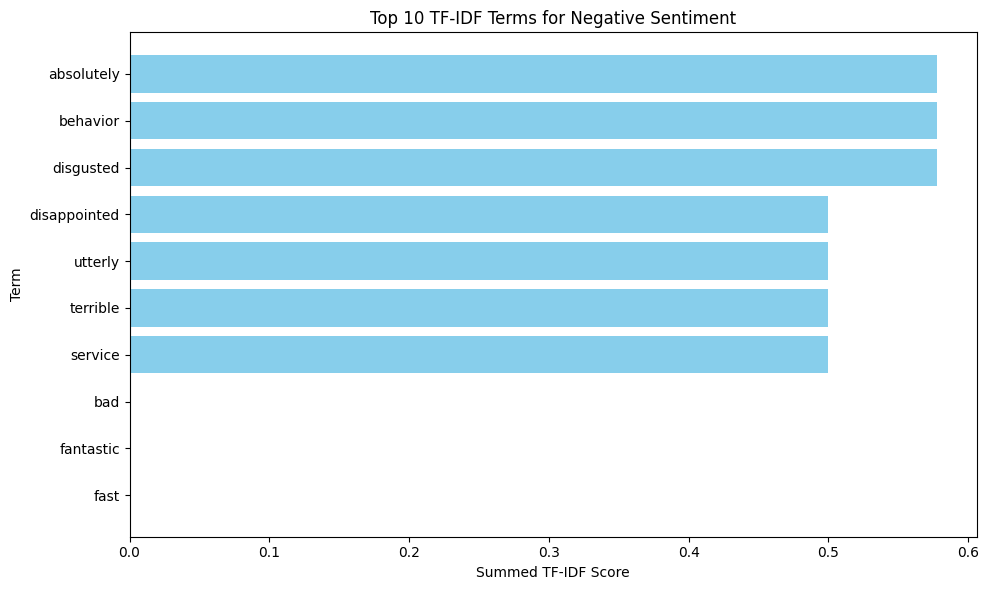

Bar chart of top TF-IDF terms for negative sentiment displayed.


In [ ]:
import matplotlib.pyplot as plt

# Select the top N terms (e.g., top 10 for demonstration)
N = 10
top_n_terms = top_negative_terms.head(N)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_n_terms.index, top_n_terms.values, color='skyblue')

# Set labels and title
plt.xlabel('Summed TF-IDF Score')
plt.ylabel('Term')
plt.title(f'Top {N} TF-IDF Terms for Negative Sentiment')

# Invert y-axis to have the highest score at the top
plt.gca().invert_yaxis()

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()
print("Bar chart of top TF-IDF terms for negative sentiment displayed.")

## Generate Word Cloud (Negative Sentiment)

### Subtask:
Create a word cloud visualization focusing on the vocabulary associated with negative sentiment. This will visually represent the most frequent and important words in negative tweets.


**Reasoning**:
To create a word cloud, I first need to import the `WordCloud` library, which is not yet available in the environment.



In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print("Libraries for word cloud generation imported.")

Libraries for word cloud generation imported.


**Reasoning**:
Now that the `WordCloud` library is imported, I will filter the DataFrame for negative sentiment tweets, combine their cleaned text, generate the word cloud, and then display it as per the subtask instructions.



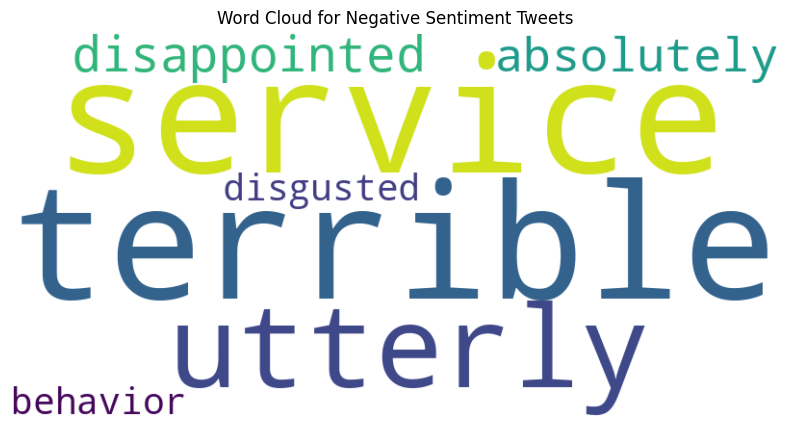

Word cloud for negative sentiment tweets generated and displayed.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Filter the df DataFrame to select only the rows where the 'sentiment' column is 'negative'.
negative_tweets_cleaned_text = df[df['sentiment'] == 'negative']['cleaned_text']

# 2. Join all the cleaned text entries for negative sentiment into a single large string.
combined_negative_text = " ".join(negative_tweets_cleaned_text)

# 3. Instantiate a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_negative_text)

# 4. Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.show()

print("Word cloud for negative sentiment tweets generated and displayed.")